In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n = 15
X = 2 + 20.*np.random.randn(n)
# print X

Find $\mu$ and $\sigma$ to maximise
$$p(\vec{x}) = \frac{1}{\left(\sigma \sqrt{2 \pi}\right)^n} \cdot exp{\left( - \sum\limits_{i=0}^{n-1} \frac{(x_i - \mu)^2}{2 \sigma ^2}\right)} $$ 
Taking log of both sides, this is equilvalent to minimising
$$- \log( p(\vec{x}) ) = n \left(\log(\sigma) + \frac{1}{2} \log(2 \pi)\right) + \frac{1}{2 \sigma ^2} {\left( \sum\limits_{i=0}^{n-1} {(x_i - \mu)^2}\right)} $$ 
For minimum, since the minimum value of $\mu$ does not depend on $\sigma$, 
$$ \mu = \frac{1}{n} \sum\limits_{i=0}^{n-1} x_i $$

In [4]:
mean_X = np.mean(X)
print(mean_X)

2.75225166891


We will plot the log likelihood to find the optimal $\sigma$.

In [5]:
squared_difference = np.sum(np.power(X + [-mean_X]*n, 2))
print(squared_difference)

5205.00803657


Plotting this w.r.t. $\sigma$ 

$$n \left(\log(\sigma) + \frac{1}{2} \log(2 \pi)\right) + \frac{1}{2 \sigma ^2} {\left( \sum\limits_{i=0}^{n-1} {(x_i - \mu)^2}\right)} $$ 

In [6]:
s_range = np.arange(20-15,20+20,.1)
s_ = [n * (np.log(s) + 0.5*np.log(np.sqrt(2 * np.pi))) + 0.5 * (s**(-2)) * squared_difference for s in s_range]
s_1 = [n * (np.log(s) + 0.5*np.log(np.sqrt(2 * np.pi))) for s in s_range]
s_2 = [0.5 * (s**(-2)) * squared_difference for s in s_range]

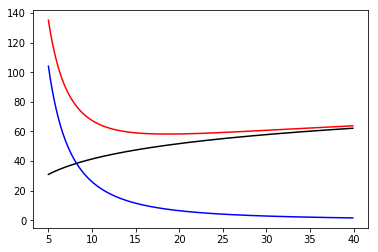

In [7]:
plt.plot(s_range, s_, color='r')
plt.plot(s_range, s_1, color='k') # first term
plt.plot(s_range, s_2, color='b') # second term
plt.show()

In [7]:
print(s_range[np.argmin(s_)])

18.4


In [8]:
sample_variance = squared_difference / n
print("sample_variance : {}".format(sample_variance))
std_wo_corr = np.sqrt(sample_variance)
print("std_dev_wo_corr : {}".format(std_wo_corr))
populn_variance = squared_difference / (n-1)
print("populn_variance : {}".format(populn_variance))
std_dev = np.sqrt(populn_variance)
print("std_dev : {}".format(std_dev))
# results vary

sample_variance : 338.629330295
std_dev_wo_corr : 18.401883879
populn_variance : 362.817139602
std_dev : 19.0477594378


## Calculating derivative  
Differentiating w.r.t. $\sigma$

$$ \frac{n}{\sigma} - \frac{1}{\sigma ^ 3} {\left( \sum\limits_{i=0}^{n-1} {(x_i - \mu)^2}\right)} $$

Solving for zero

$$ \sigma^2 = \frac{1}{n} {\left( \sum\limits_{i=0}^{n-1} {(x_i - \mu)^2}\right)} $$

Question is, how is this related to the unbiased estimate for population variance / std_dev?

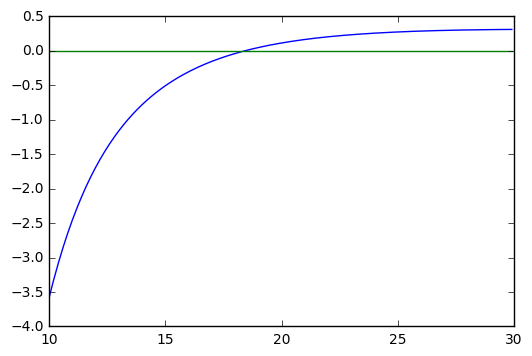

In [9]:
s_1 = [n / s - 1 / (s**3) * squared_difference for s in s_range]
plt.plot(s_range, s_1)
plt.plot(s_range, [0]*len(s_range))
plt.show()

In [ ]:
# maximum likelihood - given the observed data, choose the one that most likely give me this
# UE - estimator which has the smaller variance, considers sample size? different? 
# minimum variance - estimate how far it range, looking the variance of the estimator
# "minimise variance of variance"?
# asympoittcally unbaised, as long as for large samples it close, now data processing is cheap
